In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import sys, os
sys.path.append(os.path.realpath('..'))
from scipy.interpolate import interp1d

from hyppo.independence import *
from hyppo.ksample import KSample, MMD
from hyppo.tools import linear

In [2]:
sns.set(color_codes=True, style='white', context='talk', font_scale=1.5)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[1:5] + PALETTE[6:], n_colors=9)

In [3]:
N = [
    50,
    100,
    200,
    500,
    1000,
    2000,
    5000,
    10000
]

TESTS = {
#     "indep" : [Dcorr(), MGC(), HHG()],
#     "ksample" : [KSample("Hsic")],
    "fast" : [Dcorr()]#, MaxMargin("Dcorr")]
}

In [4]:
# Function runs wall time estimates using timeit (for python) and 
def estimate_wall_times(tests, **kwargs):
    for test in tests:
        times = []
        for n in N:
            x, y = linear(n, 1, noise=True)
            if test_type == "ksample":
                hyp_test = KSample(test.__name__)
            else:
                hyp_test = test()
            time = %timeit -n 1 -r 3 -q -o hyp_test.test(x, y, workers=-1, **kwargs)
            times.append(np.min(time.timings))
        np.savetxt('../hyppo/perf/{}_{}.csv'.format(test_type, test.__name__), times, delimiter=',')
    return times

In [5]:
# kwargs = {}
# for test_type in TESTS.keys():
#     if test_type == "fast":
#         kwargs["auto"] = True
#     estimate_wall_times(TESTS[test_type], **kwargs)

In [6]:
FONTSIZE = 30

TEST_METADATA = {
    "MGC" : {
        "test_name" : "MGC (hyppo)",
        "color" : "#e41a1c"
    },
    "HHG" : {
        "test_name" : "HHG (hyppo)",
        "color" : "#4daf4a"
    },
    "Dcorr" : {
        "test_name" : "Dcorr (hyppo)",
        "color" : "#377eb8"
    },
    "ksample_Hsic" : {
        "test_name" : "MMD (hyppo)",
        "color" : "#ff7f00"
    },
    "fast_Dcorr" : {
        "test_name" : "Fast Dcorr (hyppo)",
        "color" : "#984ea3"
    },
    "fast_Dcorr_nln" : {
        "test_name" : "Fast 1D Dcorr (hyppo)",
        "color" : "#984ea3"
    },
    "HHG_hhg" : {
        "test_name" : "HHG (HHG)",
        "color" : "#4daf4a"
    },
    "Dcorr_energy" : {
        "test_name" : "Dcorr (energy)",
        "color" : "#377eb8"
    },
    "Dcorr_kernlab" : {
        "test_name" : "MMD (kernlab)",
        "color" : "#ff7f00"
    },
}


def plot_wall_times():
    fig = plt.figure(figsize=(10,7))
    ax = plt.subplot(111)
    
    i = 0
    for file_name, metadata in TEST_METADATA.items():
        test_times = np.genfromtxt('../hyppo/perf/{}.csv'.format(file_name), delimiter=',')
        
        kwargs = {}
        if file_name in ["HHG_hhg", "Dcorr_energy", "Dcorr_kernlab"]:
            kwargs = {"linestyle" : "dashed"}
        elif file_name in ["fast_Dcorr_nln"]:
            kwargs = {"linestyle" : "dotted"}
        ax.plot(N, test_times, color=metadata["color"], label=metadata["test_name"], lw=5, **kwargs)
        i += 1
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Execution Time\n(Seconds)')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xticks([1e2, 1e3, 1e4])
    ax.set_yticks([1e-4, 1e-2, 1e0, 1e2, 1e4])
    
    leg = plt.legend(bbox_to_anchor=(0.5, -0.05), bbox_transform=plt.gcf().transFigure,
                     ncol=2, loc='upper center')
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)
    plt.savefig('../hyppo/figs/wall_times.pdf', transparent=True, bbox_inches='tight')

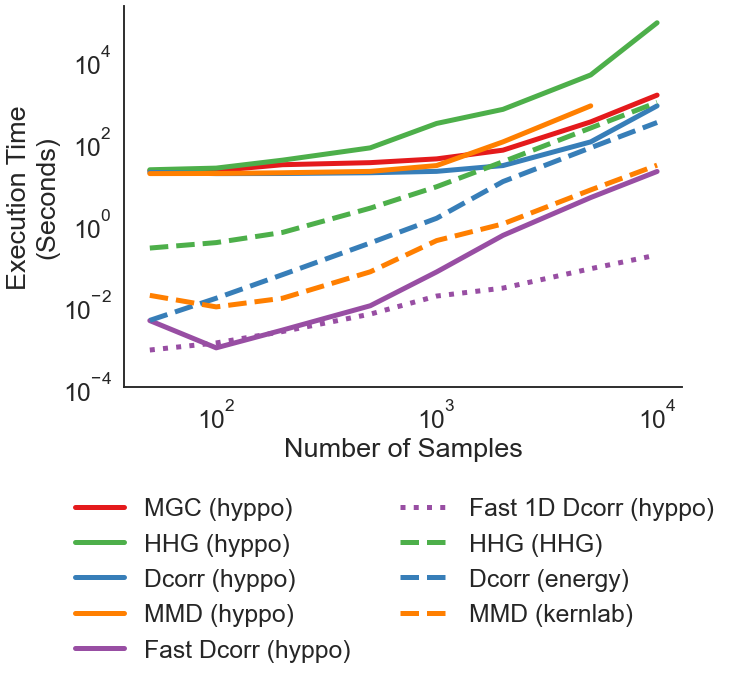

In [7]:
plot_wall_times()

In [46]:
# Function runs wall time estimates using timeit (for python) and 
def estimate_wall_times_hd(tests, **kwargs):
    for test in tests:
        times = []
        for n in N:
            x, y = linear(n, 3, noise=True)
            _ = test.test(x, y)
            time = %timeit -n 1 -r 3 -q -o test.test(x, y, auto=True)
            times.append(np.min(time.timings))
        np.savetxt('../hyppo/perf/MaxMargin.csv', times, delimiter=',')
    return times

kwargs = {}
for test_type in TESTS.keys():
    if test_type == "fast":
        kwargs["auto"] = True
    estimate_wall_times_hd(TESTS[test_type], **kwargs)

# TESTS = {
#     "indep" : [Dcorr(), MGC(), HHG()],
#     "ksample" : [Hsic],
#     "fast_nln" : [Dcorr()]
# }

In [47]:
TEST_METADATA = {
    "fast_Dcorr" : {
        "test_name" : "Fast Dcorr (hyppo)",
        "color" : "#984ea3"
    },
    "MaxMargin" : {
        "test_name" : "MaxMargin (p=3) (hyppo)",
        "color" : "#f781bf"
    },
}


def plot_wall_times():
    fig = plt.figure(figsize=(10,7))
    ax = plt.subplot(111)
    
    i = 0
    for file_name, metadata in TEST_METADATA.items():
        test_times = np.genfromtxt('../hyppo/perf/{}.csv'.format(file_name), delimiter=',')
        
        kwargs = {}
        if file_name in ["HHG_hhg", "Dcorr_energy", "Dcorr_kernlab"]:
            kwargs = {"linestyle" : "dashed"}
        elif file_name in ["fast_Dcorr_nln"]:
            kwargs = {"linestyle" : "dotted"}
        ax.plot(N, test_times, color=metadata["color"], label=metadata["test_name"], lw=5, **kwargs)
        i += 1
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Execution Time\n(Seconds)')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xticks([1e2, 1e3, 1e4])
    ax.set_yticks([1e-4, 1e-2, 1e0, 1e2, 1e4])
    
    leg = plt.legend(bbox_to_anchor=(0.5, -0.05), bbox_transform=plt.gcf().transFigure,
                     ncol=2, loc='upper center')
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)
    plt.savefig('../hyppo/figs/wall_times.pdf', transparent=True, bbox_inches='tight')

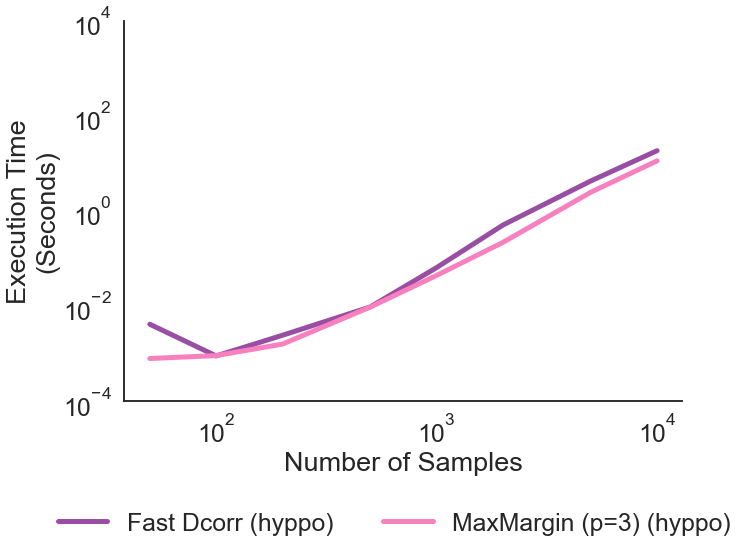

In [48]:
plot_wall_times()